# Lorenz Attractor Demo

My master's degree is in Systems Science, and one of the important areas of study in that field is complex dynamic systems, which is a whole area of mathematics unto itself. One of the objects of interest in the study of dynamic systems is the [attractor](https://en.wikipedia.org/wiki/Attractor), 'a set of states toward which a systems tends to evolve, for a wide variety of starting conditions of the system' (from the wiki)...

The [**Lorenz System**](https://en.wikipedia.org/wiki/Lorenz_system) is perhaps the best-known of these systems. The Lorenz attractor is a set of chaotic (highly sensitive to initial conditions) solutions to the Lorenz system. In popular media the term 'butterfly effect' is taken from the real-world implications of this system, in particular that several different initial chaotic conditions evolve in a way that never repeats, so the behavior is chaotic or unpredictable. One takeaway is that chaotic systems can be completely deterministic and yet still be unpredictable over long periods of time. This is the idea underlying the 'butterfly effect,' that a small action like the flapping of a butterfly's wings could, over time, result in a vastly different state of the world, as the small initial differences in state compound and become much more significant. This sensitivity to initial conditions and trajectory divergence is demonstrated further down in this notebook under Version 2.

## Version 1: Lorenz Attractor using only numpy

I Modified the original code to plot two different results with slightly different initial conditions. I quickly realized that this is very tedious when using only numpy - this code could be slightly more efficient if I implemented a list of initial conditions but without the odeint or some other interface it is time-consuming to implement several similar versions of the solution.

This version performs the integration 'by hand' (using only numpy) instead of relying on the built-in ODE (Ordinary Differential Equations) functionality found in the Scipy package. This solution is therefore less compact, but it is still useful for letting us see more of the details of the integration calculations.

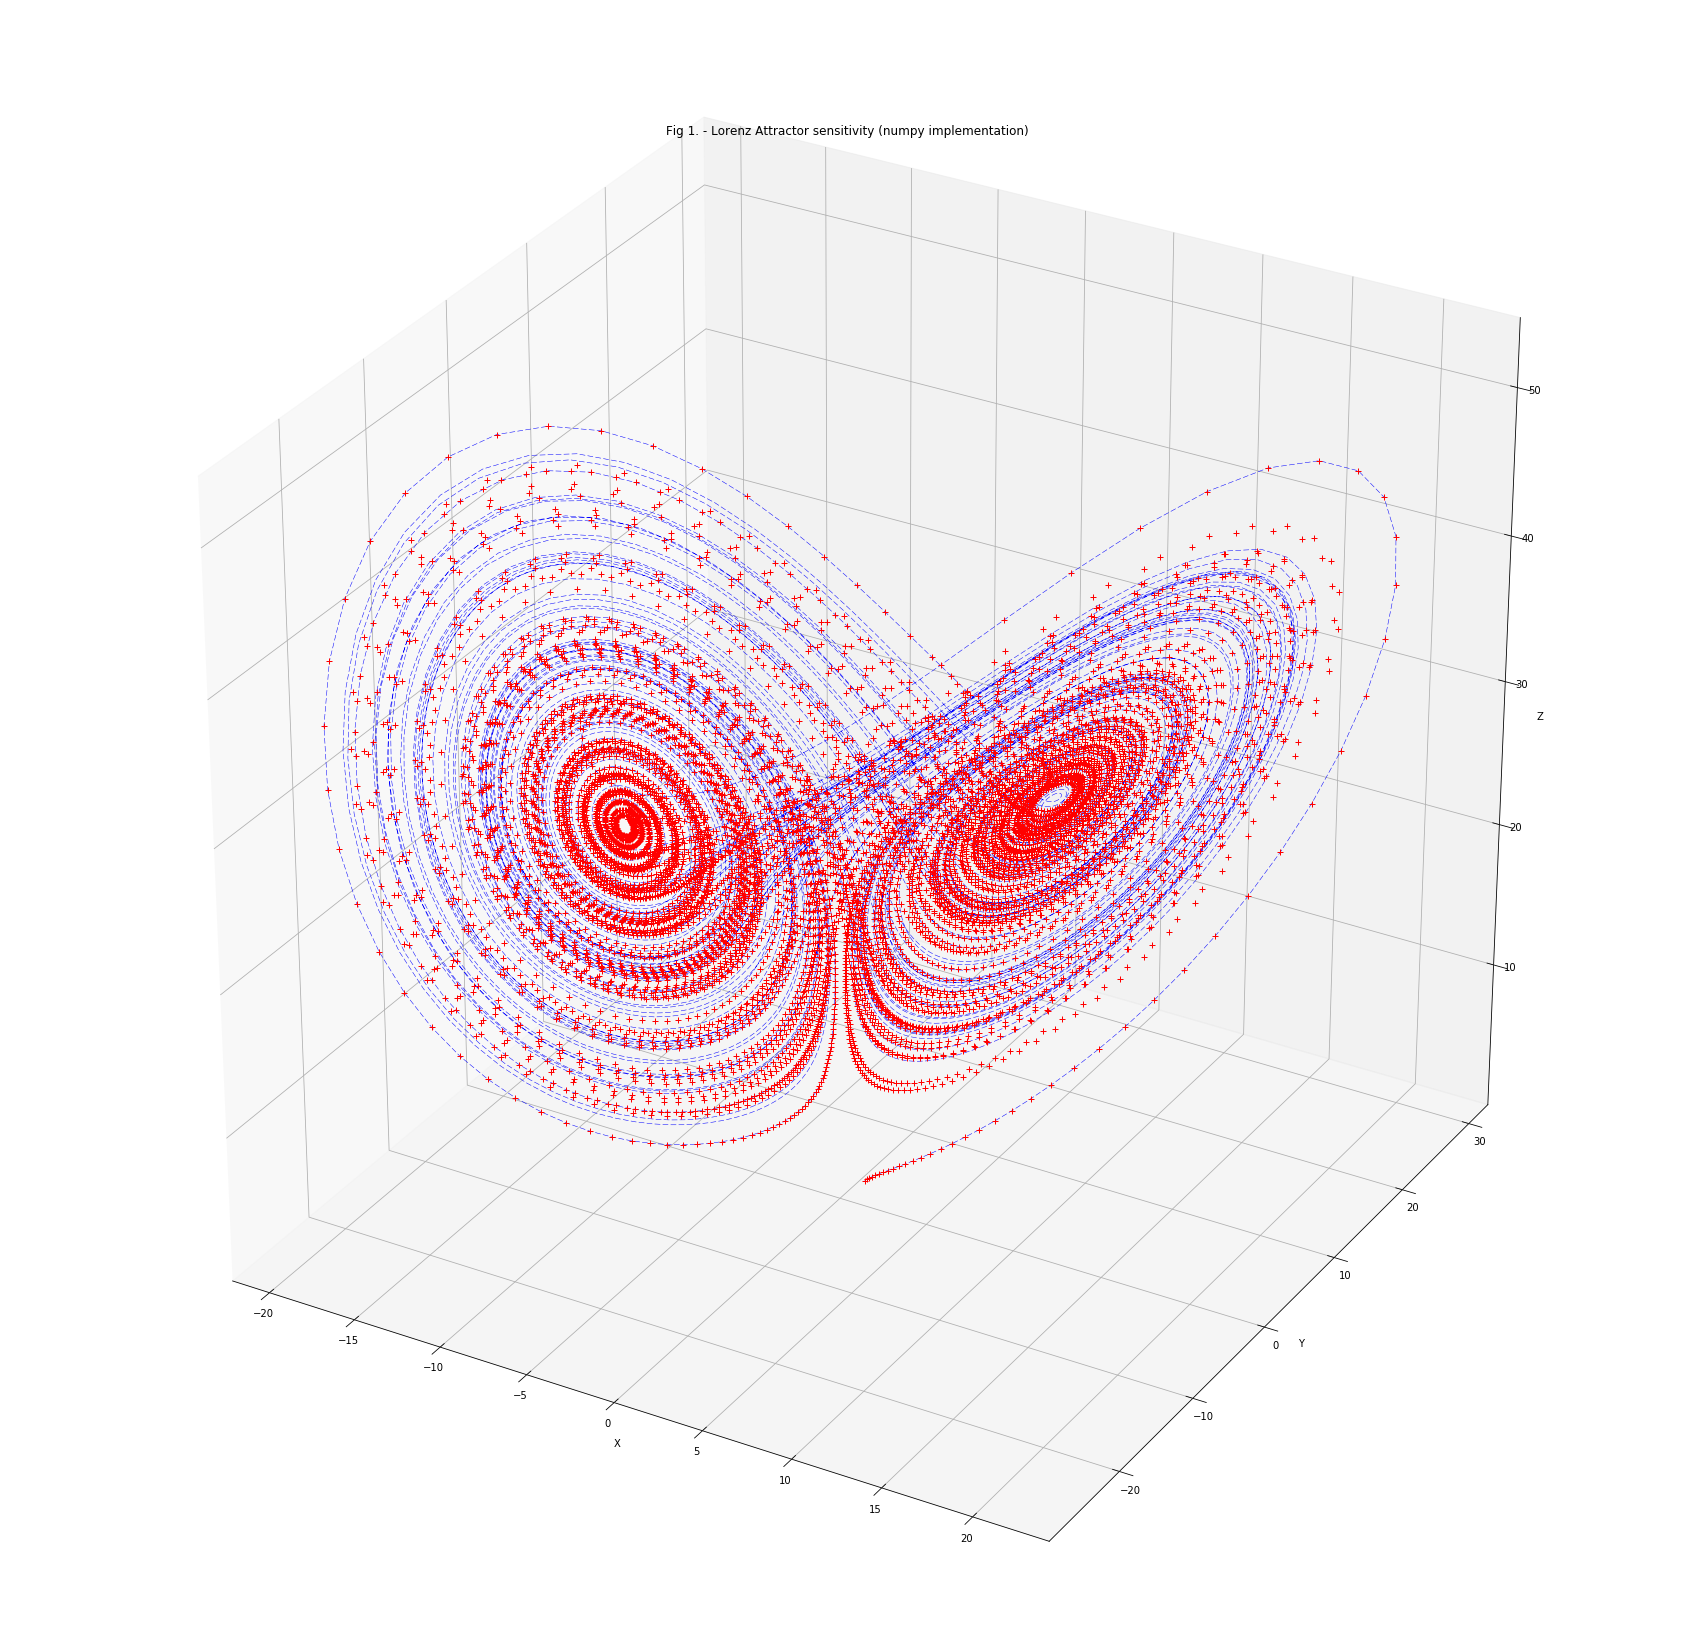

In [57]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rho = 28
sigma = 10
beta = 8.0 / 3.0

def lorenz(x, y, z, s=sigma, r=rho, b=beta):=
    """
    lorenz() accepts x, y, z values and parameters as inputs and calculates derivatives at that point
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (1., 1., 1.)

# Stepping through time
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# initialize figure and set up 3d projection
fig = plt.figure(figsize=(30,30))
ax = fig.gca(projection='3d')

# plot points, set labels and figure title
ax.plot(xs, ys, zs,'b--',lw=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Fig 1. - Lorenz Attractor sensitivity (numpy implementation)")
#ax.plot(xs[0:], ys[0:], zs[0:],'or')

#recalculate from same initial conditions with a very small difference
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (1., 1., 1.000001)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

ax.plot(xs, ys, zs, 'r+', lw=0.5)
plt.show()

I find these plots to be remarkably beautiful, in part because of the particular balance of chaos and order that they represent. There is clearly some stability to the behavior, as the trajectory builds up into the 'butterfly wing' pattern of two flat lobes at an angle to each other. But yet the shape of the solution would be very difficult to imagine just from looking at the underlying equations. 

The above code works but is definitely working harder and not smarter. So let's try using an integration interface...

# Version 2 - this time using odeint from SciPy

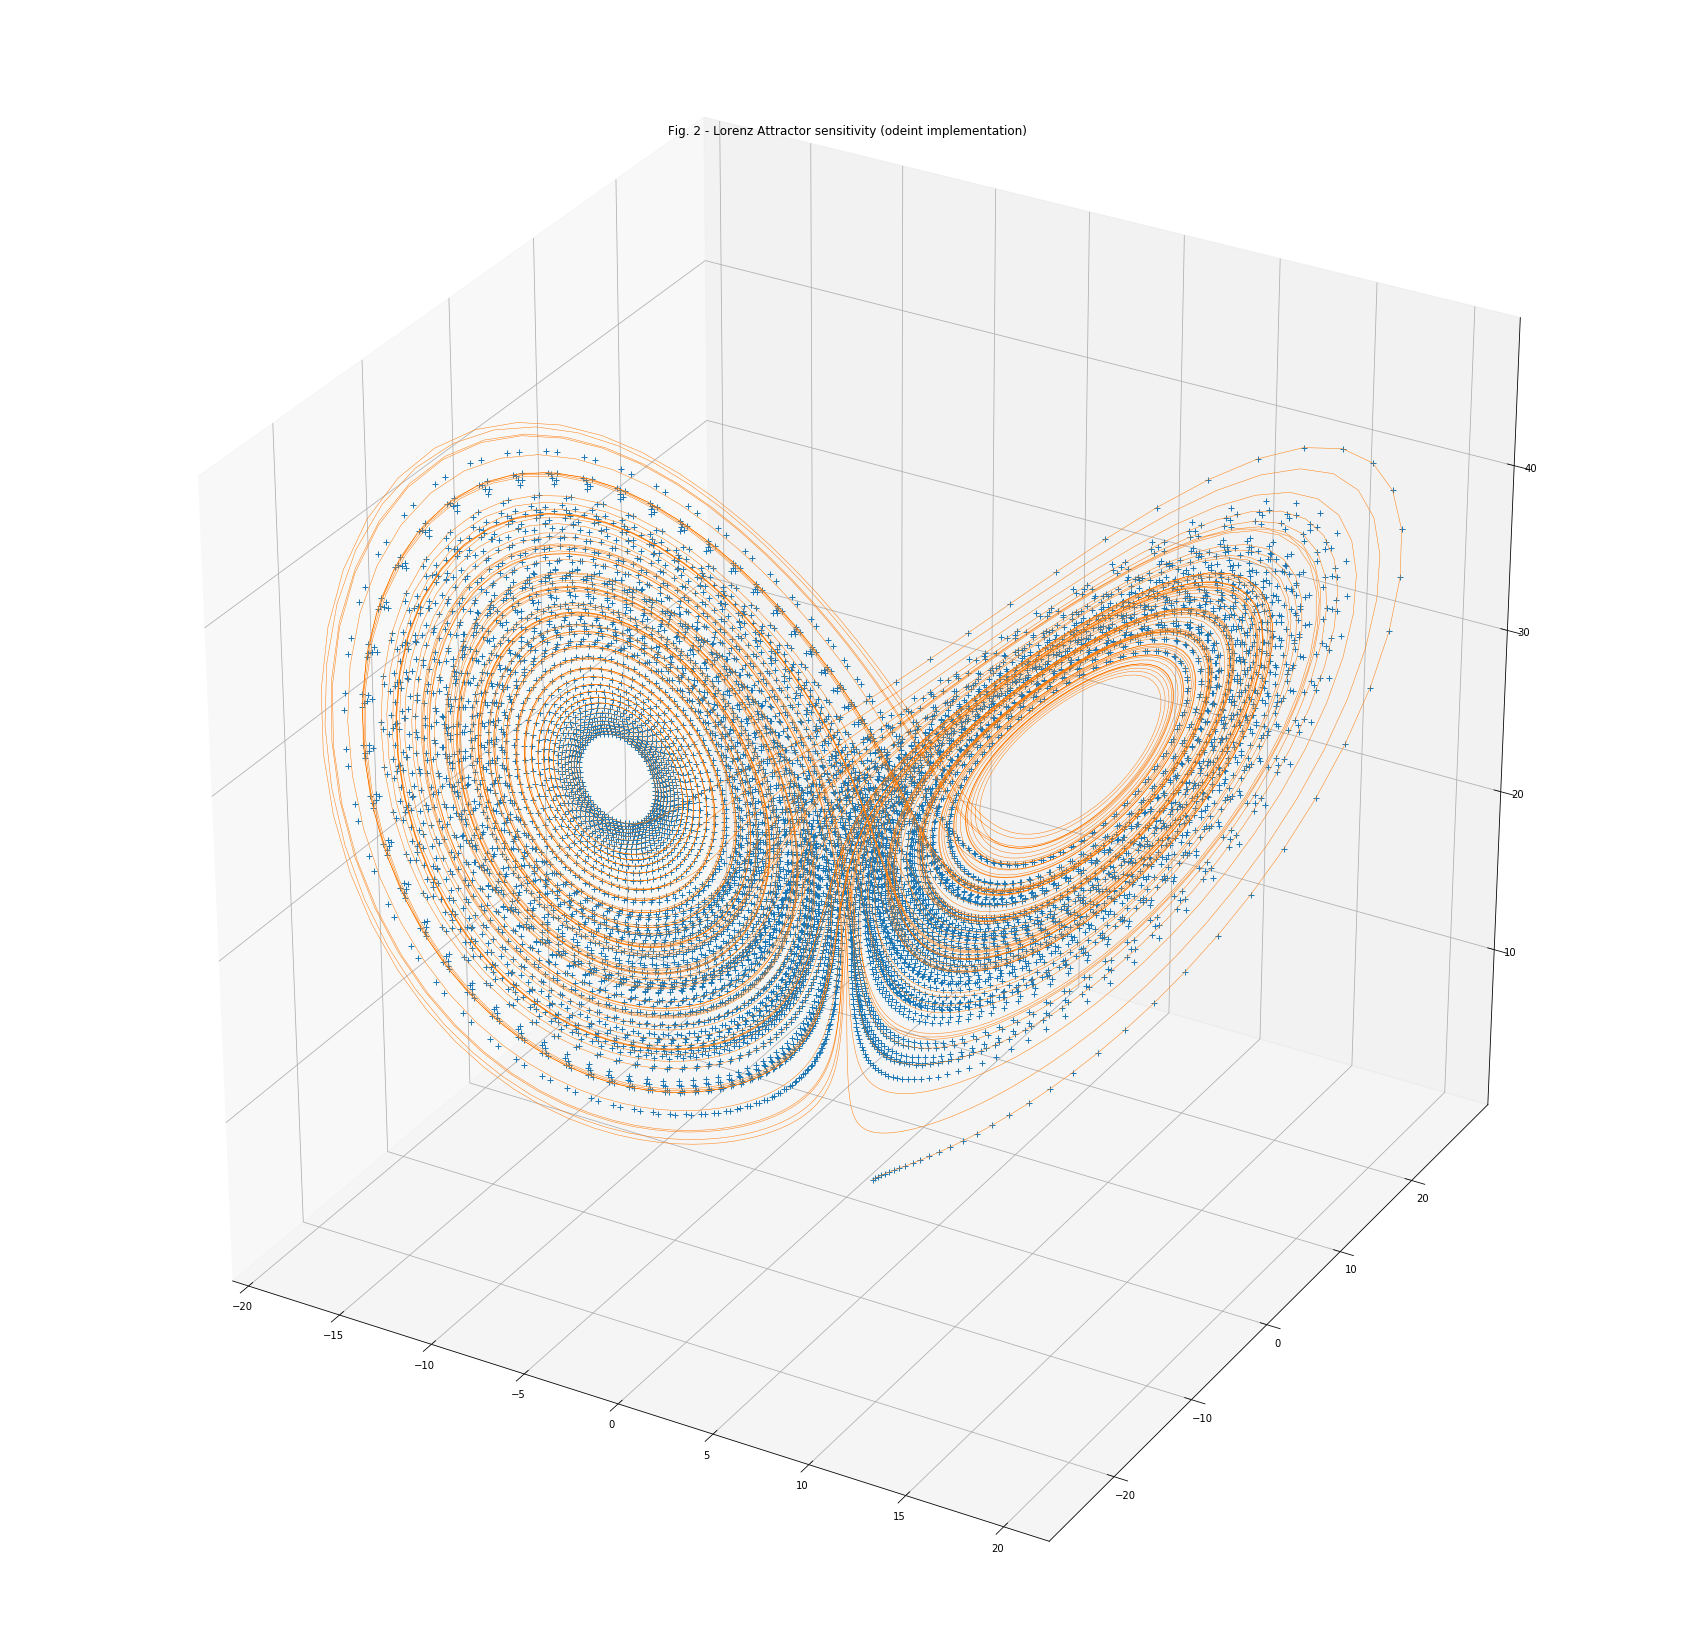

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

#initialize state0 as a list of initial condition lists
state0 = [[1.0,1.0,1.0],[1.0,1.0,1.0000001]]
t = np.arange(0.0, 100.0, 0.01)

#initialize plot
fig = plt.figure(figsize=(30,30))
ax = fig.gca(projection='3d')
plt.title('Fig. 2 - Lorenz Attractor sensitivity (odeint implementation)')

#loop over the list of initial states
#for each iteration we solve with those initial conditions, pick a unique plot marker, and add data to plot
#this format allows us to easily add a new trajectory to plot by just add 
#a new set of initial conditions to state0
#if we plot more than two the plot is too crowded so I am just doing two at a time but wanted to demonstrate
#this implementation
for idx,xyz in enumerate(state0):
    #here we can see how the integration interface cleans things up: the actual solving is done by one call to odeint()
    #instead of by an explicit for loop
    states = odeint(f, xyz, t)
    markers = ['+','-','x']
    ax.plot(states[:,0], states[:,1], states[:,2],markers[idx],lw=0.5)

plt.show()

#### Note that in this version, I implement initial condition as a list of lists. This makes it easy to plot multiple sets, each with its own initial condition. We enumerate and loop over state0, so if you add another initial condition list to state0, it will be included in the plot automatically. This keeps the code compact. List functionality is one of the things that is special about python. Its built-in list functionality allows the programmer to greatly simplify certain tasks. 

Sensitivity to initial conditions can be seen in each figure individually and in the difference between fig. 1 and fig. 2.  Notice the holes in the wings of the butterfly which are present in fig. 2 but not fig. 1 (in fig.1 both trajectories spiral all the way into the middle of the 'wing' at some point). Presumably this is due to the difference in integration method between the two versions. Version 1 uses Euler method. Version 2 (odeint) uses one of the Runge-Kutta methods by default. As we have seen with a tiny change in initial conditions, ANY small difference in trajectories will be magnified over successive iterations, and the trajectories will eventually diverge.

In each image, we first plot the curve starting from (1,1,1), then we plot starting from (1,1,1.0000001). The trajectories overlap initially but quickly diverge.

# Version 3 - different choices of parameters
* a.(ρ = 15,σ = 10, β = 8/3) - With this choice of parameters the trajectory collapses to a fixed point before the trajectories have time to diverge significantly (transient chaos) (Fig. 3)
* b.(ρ = 9/10,σ = 1, β = 100) - Globally stable solution (will collapse to same fixed point even with different initial conditions)

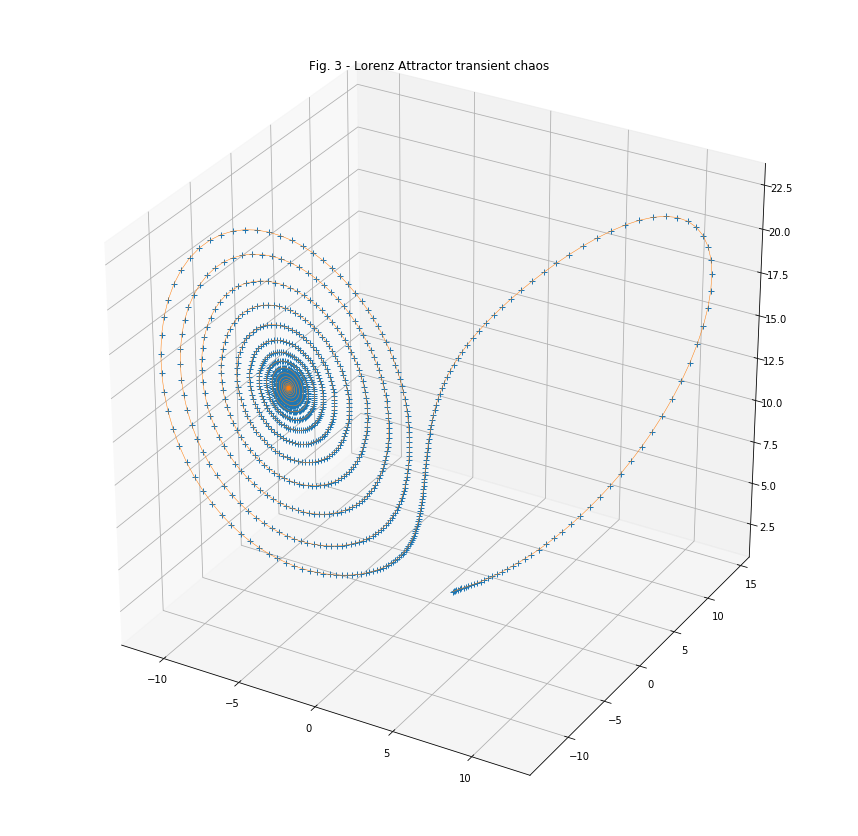

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 15.
sigma = 10.
beta = 8.0 / 3.0

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

#initialize state0 as a list of initial condition lists
state0 = [[1.0,1.0,1.0],[1.0,1.0,1.0000001]]
t = np.arange(0.0, 100.0, 0.01)

#initialize plot
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
plt.title('Fig. 3 - Lorenz Attractor transient chaos')

for idx,xyz in enumerate(state0):
    states = odeint(f, xyz, t)
    markers = ['+','-','x']
    ax.plot(states[:,0], states[:,1], states[:,2],markers[idx],lw=0.5)

plt.show()



In this version of the system, which different choice of parameters, we see a different regime of behavior. In the previous versions, the point would continue to move as the system evolved, never settling at a particular point. But in the above version, we see that the movement is initially chaotic, with the trajectory swinging wildly, before it begins to settle into a spiral that becomes tighter and tigther before it finally collapses down into a point that it never escapes from.

We can also see that sensitivity to initial conditions is greatly reduced in this regime. The trajectory of the two particles with slightly different intial conditions remain indistinguishable from each other throughout the whole evolution of the system, eventually arriving at the same (or very similar) point of stability.

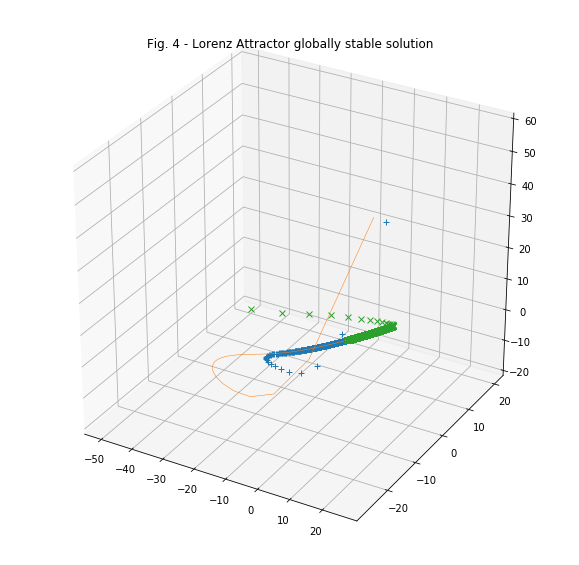

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 9. / 10.
sigma = 30.
beta = 100.

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

#initialize state0 as a list of initial condition lists
state0 = [[20.,-10.,50.],[25.,-20.,60.0000001],[-50.,20.,-20.]]
t = np.arange(0.0, 100.0, 0.01)

#initialize plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
plt.title('Fig. 4 - Lorenz Attractor globally stable solution')

for idx,xyz in enumerate(state0):
    states = odeint(f, xyz, t)
    markers = ['+','-','x']
    ax.plot(states[:,0], states[:,1], states[:,2],markers[idx],lw=0.5)

plt.show()

The behavior in the above regime of the system is even more dramatically different. In Fig. 3 the trajectory eventually collapses to a point, but only after several swirls that seem as if they might be forming the characteristic butterfly wings from the previous attractors. In this version, with yet another different set of parameter values, the system exhibits very little chaotic behavior, quickly collapsing to a point.

### Learning takeaways

This exercise was instructive in a number of ways. Aside from simulation or python it was a chance to further familiarize myself with the workings of the Lorenz system. Lorenz made a major contribution to early chaos theory
and this exercise gave me a reason to familiarize myself more with several of the parameter choices and solutions of interest. Though the system is highly chaotic, it also demonstrates some stability. Fig. 4 is an illustration of this - given a certain choice of parameters, the trajectories will quickly collapse to the same fixed point regardless of initial conditions (global stability).

On the programming side, this was also an opportunity to begin familiarizing myself with numerical integration / solution interfaces in python (odeint and odespy - even though I didn't end up using odespy, that was my original goal). Also gained more familiarity with numerical integration *methods* (Euler, RK, etc.) and their mechanics.
Learning more about list functionality was also immensely helpful. Python (as compared to, say, C++) builds in a lot of list functionality that makes certain types of task very easy. Finally, I picked up more skills in working with plots and particularly pyplot from matplotlib. Sizing plots, labeling plots and axes, specifying line color and style, and iteratively adding objects to plots are among the skills gained and sharpened.

